In [33]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import math

In [34]:
eps = 1
sigma = 1
sigma_square = sigma**2 

In [35]:
def r(N, L):
    
    return np.random.uniform(-L/2, L/2, (N, 3))

In [36]:
def U(r, N): 

    U = 0 

    for i in range(N):
        
        for j in range(i+1, N):
            
            r_ij_vec = r[j] - r[i]
            r_ij_square = (r_ij_vec**2).sum()    
                
            term1 = (sigma_square/r_ij_square)**3
            
            U += 4*eps*term1*(term1-1)

    return U

In [37]:
def f(r, N):

    f = -2*alpha*r
    
    for i in range(N-1):
            
        for j in range(i+1, N):

            r_ij_vec = r[j] - r[i]             
            r_ij_square = (r_ij_vec**2).sum()    
            
            term = (sigma_square/r_ij_square)**3
            
            f_ij = -24*eps*(1/r_ij_square)*term*(2*term-1)*r_ij_vec 
            
            f[i] += f_ij
            f[j] -= f_ij
            
    return f

In [38]:
def line_search (r0, U0, d, N, delta=0.001, LStol=10**(-8), MaxLSSteps=100000):
    
    LSSteps = 0
    
    for i in range(N):        
        d[i] = d[i] / math.sqrt((d[i]**2).sum())
            
    r1 = r0 + delta*d 
    r2 = r1 + delta*d
    
    U1 = U(r1, N) 
    U2 = U(r2, N) 
    
    while LSSteps <= MaxLSSteps:

        if U2>U1 and U0>U1:
            
            r = (3-math.sqrt(5))/2   
            h = (r2 - r0)*r 
                
            r_0 = r0 + h
            r_2 = r2 - h
            
            U_0 = U(r_0, N) 
            U_2 = U(r_2, N) 
            
            while abs(U2-U0) >= LStol*abs(U0):     
                
                if U_0 < U_2: 
                             
                    r2 = r_2
                    U2 = U_2
                    
                    r_2 = r_0
                    U_2 = U_0 
                    
                    r_0 = r0 + (r2 - r0)*r
                    U_0 = U(r_0, N)
                    
                else: 
                    
                    r0 = r_0
                    U0 = U_0
                    
                    r_0 = r_2
                    U_0 = U_2 
                
                    r_2 = r2 - (r2 - r0)*r
                    U_2 = U(r_2, N)    
                    
                LSSteps += 1
                
            break
        
        # shift value and continue searching    
        r0 = r1 
        U0 = U1
        
        r1 = r2
        U1 = U2
        
        r2 = r1 + delta*d 
        U2 = U(r2, N) 
        
        LSSteps += 1
    
    r_min = 1/2*(r0+r2)
    U_min = U(r_min, N)
                
    return r_min, U_min

In [39]:
def conjugate_gradient_better (r0, N, MaxCGSteps=10000):
    
    pos_U_df = pd.DataFrame(columns=['pos', 'U'])
    pos_U_min = pd.DataFrame(columns=['pos', 'U'])
    U_min, r_min, CGSteps_min = math.inf, 0, 0
    CGSteps, counter = 0, 0
    
    U0 = U(r0, N)
    f0 = f(r0, N)
    d = f0
    
    r1, U1 = line_search(r0, U0, d, N)
    
    while CGSteps <= MaxCGSteps:
        
        # out of the minimal region
        if U1 > U0: 
            
            if U0 < U_min: 
                
                U_min = U0
                
                pos_U_min = pos_U_df
                CGSteps_min = counter
                
            counter = 0 
            pos_U_df = pd.DataFrame(columns=['pos', 'U'])

        pos_U_df.loc[counter] = r1, U1
        r0, U0= r1, U1
        
        f1 = f(r0, N)
        
        r1, U1 = line_search(r0, U0, f1, N)
        f0 = f1     
        
        CGSteps += 1
        counter += 1
        
    return U_min, CGSteps_min, pos_U_min

done with 1 simulations for N=2, U: -0.999999999573953
done with 2 simulations for N=2, U: -0.9999999999443183
done with 3 simulations for N=2, U: -0.999999999979603
done with 4 simulations for N=2, U: -0.9999999999977468
done with 5 simulations for N=2, U: -0.9999999999969812
done with 6 simulations for N=2, U: -0.999999999676496
done with 7 simulations for N=2, U: -0.9999999996430823
done with 8 simulations for N=2, U: -0.9999999999951263
done with 9 simulations for N=2, U: -0.9999999998962615
done with 10 simulations for N=2, U: -0.9999999999951037
done with 11 simulations for N=2, U: -0.9999999999988975
done with 12 simulations for N=2, U: -0.9999999999964161
done with 13 simulations for N=2, U: -0.9999999999925827
done with 14 simulations for N=2, U: -0.9999999999141774
done with 15 simulations for N=2, U: -0.9999999996489075
done with 16 simulations for N=2, U: -0.9999999999360237
done with 17 simulations for N=2, U: -0.9999999999994725
done with 18 simulations for N=2, U: -0.999

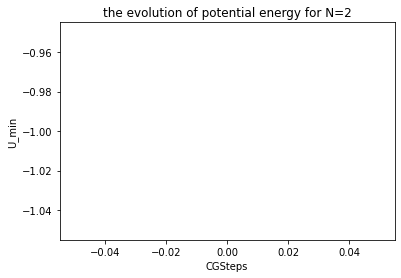

minimum potential energy for nanoparticle with 2 atoms is: -0.9999999999997621
done with 1 simulations for N=3, U: -2.999999995500474
done with 2 simulations for N=3, U: -2.999999995650748
done with 3 simulations for N=3, U: -2.9999999866468054
done with 4 simulations for N=3, U: inf
done with 5 simulations for N=3, U: -2.999999875341876
done with 6 simulations for N=3, U: -2.9999999782686593
done with 7 simulations for N=3, U: -2.999993596209354
done with 8 simulations for N=3, U: -2.999999808016457
done with 9 simulations for N=3, U: -2.99999995257041
done with 10 simulations for N=3, U: -2.9999976540594546
done with 11 simulations for N=3, U: -2.999999964482073
done with 12 simulations for N=3, U: -2.9999998201235965
done with 13 simulations for N=3, U: -2.9999999597247364
done with 14 simulations for N=3, U: -2.9999999564452535
done with 15 simulations for N=3, U: -2.999999993434553
done with 16 simulations for N=3, U: -2.9999988706146508
done with 17 simulations for N=3, U: inf
do

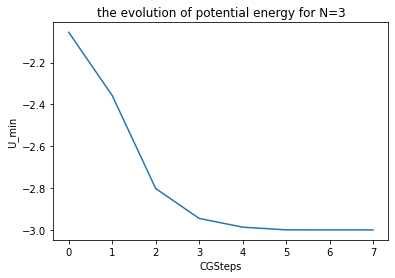

minimum potential energy for nanoparticle with 3 atoms is: -2.999999995650748
done with 1 simulations for N=4, U: -5.99995107449755
done with 2 simulations for N=4, U: inf
done with 3 simulations for N=4, U: -5.999982404962504
done with 4 simulations for N=4, U: -5.999983089426448
done with 5 simulations for N=4, U: -5.999968640755565
done with 6 simulations for N=4, U: inf
done with 7 simulations for N=4, U: -5.999971532526143
done with 8 simulations for N=4, U: -5.999987890577929
done with 9 simulations for N=4, U: inf
done with 10 simulations for N=4, U: -5.999956383170165
done with 11 simulations for N=4, U: -5.999969073990348
done with 12 simulations for N=4, U: -5.999954938576466
done with 13 simulations for N=4, U: -5.999976660485973
done with 14 simulations for N=4, U: -5.999932655670489
done with 15 simulations for N=4, U: -5.99995543109709
done with 16 simulations for N=4, U: -5.999969310516016
done with 17 simulations for N=4, U: -5.99999545051046
done with 18 simulations fo

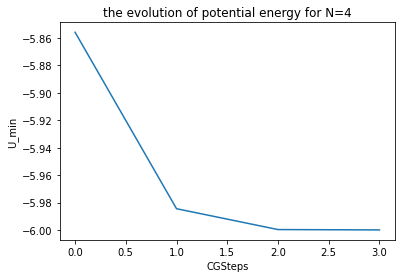

minimum potential energy for nanoparticle with 4 atoms is: -5.99999545051046
done with 1 simulations for N=5, U: -8.199045112008323
done with 2 simulations for N=5, U: -9.103694695702663
done with 3 simulations for N=5, U: -9.103828320124615
done with 4 simulations for N=5, U: -9.103801043962772
done with 5 simulations for N=5, U: -9.103815801012574
done with 6 simulations for N=5, U: -9.103676955718985
done with 7 simulations for N=5, U: -9.103725273590983
done with 8 simulations for N=5, U: -9.103724512221937
done with 9 simulations for N=5, U: -9.10381585878651
done with 10 simulations for N=5, U: -9.103833766664874
done with 11 simulations for N=5, U: -9.103816265512418
done with 12 simulations for N=5, U: -9.103768700783382
done with 13 simulations for N=5, U: -9.103815805464151
done with 14 simulations for N=5, U: -9.103814841032944
done with 15 simulations for N=5, U: -9.103679016960719
done with 16 simulations for N=5, U: -9.103829171754674
done with 17 simulations for N=5, U: 

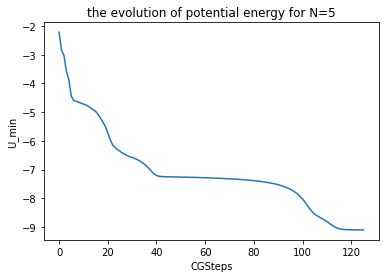

minimum potential energy for nanoparticle with 5 atoms is: -9.103834034242722
done with 1 simulations for N=6, U: -12.30252997614777
done with 2 simulations for N=6, U: -12.711853501598487
done with 3 simulations for N=6, U: -12.302632523924867
done with 4 simulations for N=6, U: -7.020542792180831
done with 5 simulations for N=6, U: -12.302523910376527
done with 6 simulations for N=6, U: -12.302539777942888
done with 7 simulations for N=6, U: -12.302537876272089
done with 8 simulations for N=6, U: -12.302463517874463
done with 9 simulations for N=6, U: -12.302423262361684
done with 10 simulations for N=6, U: -12.302425329744395
done with 11 simulations for N=6, U: -12.302449442458977
done with 12 simulations for N=6, U: -12.302474841116084
done with 13 simulations for N=6, U: -12.712022679780592
done with 14 simulations for N=6, U: -12.302418203270882
done with 15 simulations for N=6, U: -12.30240302628196
done with 16 simulations for N=6, U: -12.712035448007393
done with 17 simulatio

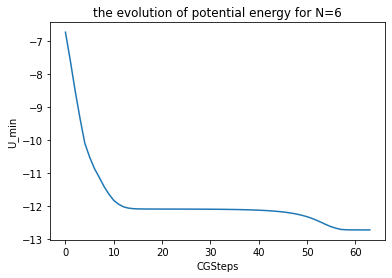

minimum potential energy for nanoparticle with 6 atoms is: -12.712035448007393
done with 1 simulations for N=7, U: -15.53233964686686
done with 2 simulations for N=7, U: -15.532503576133616
done with 3 simulations for N=7, U: -15.532546888936453
done with 4 simulations for N=7, U: -15.592606542033794
done with 5 simulations for N=7, U: -15.532512961994852
done with 6 simulations for N=7, U: -16.50504984226113
done with 7 simulations for N=7, U: -16.50512885359908
done with 8 simulations for N=7, U: -15.532544715730209
done with 9 simulations for N=7, U: -15.59259858918263
done with 10 simulations for N=7, U: -16.505100415220802
done with 11 simulations for N=7, U: -16.505098914474736
done with 12 simulations for N=7, U: -15.53236258535567
done with 13 simulations for N=7, U: -16.505220533779873
done with 14 simulations for N=7, U: -15.532445968530013
done with 15 simulations for N=7, U: -16.50516817283909
done with 16 simulations for N=7, U: -15.532303902945221
done with 17 simulations

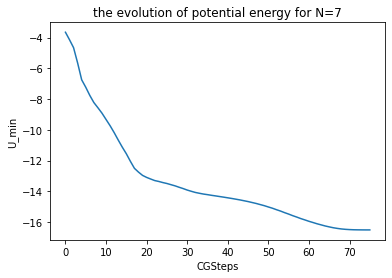

minimum potential energy for nanoparticle with 7 atoms is: -16.505220533779873
done with 1 simulations for N=8, U: -19.820694555129627
done with 2 simulations for N=8, U: -13.320828580331256
done with 3 simulations for N=8, U: -19.820981256722856
done with 4 simulations for N=8, U: -19.764466601396318
done with 5 simulations for N=8, U: -13.313699291651565
done with 6 simulations for N=8, U: -19.82111321803668
done with 7 simulations for N=8, U: -19.820658692826107
done with 8 simulations for N=8, U: -19.820858953353564
done with 9 simulations for N=8, U: -19.820946891203263
done with 10 simulations for N=8, U: -19.821220056640175
done with 11 simulations for N=8, U: -19.821070691647602
done with 12 simulations for N=8, U: -19.821254652624962
done with 13 simulations for N=8, U: -19.821097578452928
done with 14 simulations for N=8, U: -19.8211430238027
done with 15 simulations for N=8, U: -19.821120708504377
done with 16 simulations for N=8, U: -19.82083162666165
done with 17 simulatio

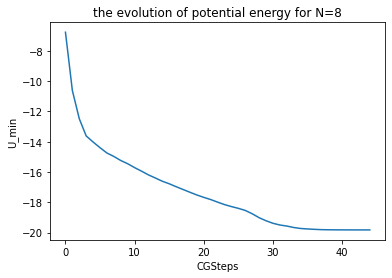

minimum potential energy for nanoparticle with 8 atoms is: -19.821287685838424
done with 1 simulations for N=9, U: -24.112823429195693
done with 2 simulations for N=9, U: -24.11262530145801
done with 3 simulations for N=9, U: -24.11263095127121
done with 4 simulations for N=9, U: -22.02985732904549
done with 5 simulations for N=9, U: -24.112880108295265
done with 6 simulations for N=9, U: -24.112640845839785
done with 7 simulations for N=9, U: -24.112799403273893
done with 8 simulations for N=9, U: -24.112687506221825
done with 9 simulations for N=9, U: -23.169749658298237
done with 10 simulations for N=9, U: -24.11294941702334
done with 11 simulations for N=9, U: -24.112746993878343
done with 12 simulations for N=9, U: -24.112980586939265
done with 13 simulations for N=9, U: -24.112844764645608
done with 14 simulations for N=9, U: -23.234480712663714
done with 15 simulations for N=9, U: -24.112944811076428
done with 16 simulations for N=9, U: -24.112932365989703
done with 17 simulatio

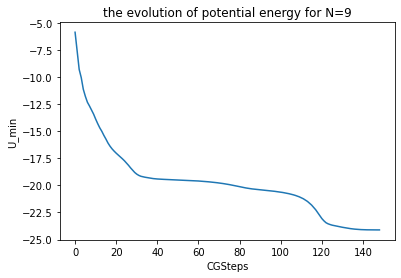

minimum potential energy for nanoparticle with 9 atoms is: -24.112980586939265
done with 1 simulations for N=10, U: -26.46304473317108
done with 2 simulations for N=10, U: -27.47860148738648
done with 3 simulations for N=10, U: -26.482000196239856
done with 4 simulations for N=10, U: -28.421938478014816
done with 5 simulations for N=10, U: -28.42167803350657
done with 6 simulations for N=10, U: -28.421830118607993
done with 7 simulations for N=10, U: -27.44617313334462
done with 8 simulations for N=10, U: -27.478770480193557
done with 9 simulations for N=10, U: -28.42162574648773
done with 10 simulations for N=10, U: -26.416561973143974
done with 11 simulations for N=10, U: -27.544208436250543
done with 12 simulations for N=10, U: -18.536215785628272
done with 13 simulations for N=10, U: -28.421516468284985
done with 14 simulations for N=10, U: -27.44618424234175
done with 15 simulations for N=10, U: -28.421632082250664
done with 16 simulations for N=10, U: -28.421987743917278
done wit

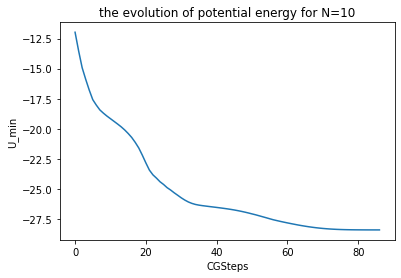

minimum potential energy for nanoparticle with 10 atoms is: -28.422087525906758
done with 1 simulations for N=11, U: -32.76493916105748
done with 2 simulations for N=11, U: -32.76536367614814
done with 3 simulations for N=11, U: -31.913534687456185
done with 4 simulations for N=11, U: -22.826659744353286
done with 5 simulations for N=11, U: -32.764554040440295
done with 6 simulations for N=11, U: -30.950603583375628
done with 7 simulations for N=11, U: -32.76476272076789
done with 8 simulations for N=11, U: -31.913233430904054
done with 9 simulations for N=11, U: -32.76469633474185
done with 10 simulations for N=11, U: -29.91624599914893
done with 11 simulations for N=11, U: -30.849536908063882
done with 12 simulations for N=11, U: -31.772955777509512
done with 13 simulations for N=11, U: -31.772869187684865
done with 14 simulations for N=11, U: -32.76487233249334
done with 15 simulations for N=11, U: -32.76464903374803
done with 16 simulations for N=11, U: -32.76440146116874
done with

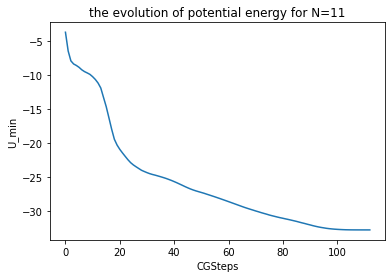

minimum potential energy for nanoparticle with 11 atoms is: -32.76536367614814
done with 1 simulations for N=12, U: -36.23164598101665
done with 2 simulations for N=12, U: -36.34582680292389
done with 3 simulations for N=12, U: -36.24226305989416
done with 4 simulations for N=12, U: -35.26159582233342
done with 5 simulations for N=12, U: -37.96512108337864
done with 6 simulations for N=12, U: -36.241841059561736
done with 7 simulations for N=12, U: -37.96604677794323
done with 8 simulations for N=12, U: -33.83095345162589
done with 9 simulations for N=12, U: -36.17665788773798
done with 10 simulations for N=12, U: -37.96605208971152
done with 11 simulations for N=12, U: -36.30444970929903
done with 12 simulations for N=12, U: -36.241431118909496
done with 13 simulations for N=12, U: -36.14879001024153
done with 14 simulations for N=12, U: -36.149614798372724
done with 15 simulations for N=12, U: -26.200648952114374
done with 16 simulations for N=12, U: -36.34583530242495
done with 17 s

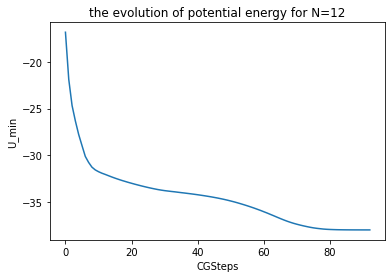

minimum potential energy for nanoparticle with 12 atoms is: -37.96665156802995
done with 1 simulations for N=13, U: -36.386098211762764
done with 2 simulations for N=13, U: -44.3248632351099
done with 3 simulations for N=13, U: -41.4695579662107
done with 4 simulations for N=13, U: -39.83645668128149
done with 5 simulations for N=13, U: -44.3262768319834
done with 6 simulations for N=13, U: -44.32584601503387
done with 7 simulations for N=13, U: -40.70927123210316
done with 8 simulations for N=13, U: -40.49868199499811
done with 9 simulations for N=13, U: -40.97774222674235
done with 10 simulations for N=13, U: -41.39142053876406
done with 11 simulations for N=13, U: -41.44145413918686
done with 12 simulations for N=13, U: -31.018178966701992
done with 13 simulations for N=13, U: -41.39241370671715
done with 14 simulations for N=13, U: -37.40842994200976
done with 15 simulations for N=13, U: -37.95582600824099
done with 16 simulations for N=13, U: -40.53915405350348
done with 17 simula

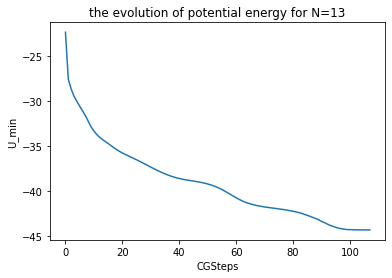

minimum potential energy for nanoparticle with 13 atoms is: -44.3262768319834
done with 1 simulations for N=14, U: -45.091496831639006
done with 2 simulations for N=14, U: -40.80292812085413
done with 3 simulations for N=14, U: -35.774151089616645
done with 4 simulations for N=14, U: -44.42412722299202
done with 5 simulations for N=14, U: -44.90437295407587
done with 6 simulations for N=14, U: -47.84264544879558
done with 7 simulations for N=14, U: -47.84255796072495
done with 8 simulations for N=14, U: -39.6012354248602
done with 9 simulations for N=14, U: -47.842413156269615
done with 10 simulations for N=14, U: -47.84315095725934
done with 11 simulations for N=14, U: -47.842204525643325
done with 12 simulations for N=14, U: -47.84323463901586
done with 13 simulations for N=14, U: -47.84364472109727
done with 14 simulations for N=14, U: -47.84241613537014
done with 15 simulations for N=14, U: -47.842282116577785
done with 16 simulations for N=14, U: -47.84323809373693
done with 17 si

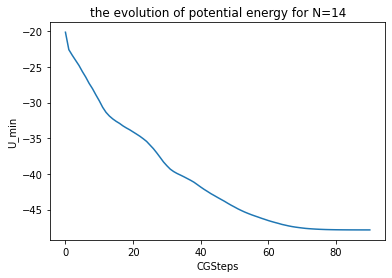

minimum potential energy for nanoparticle with 14 atoms is: -47.84364472109727
done with 1 simulations for N=15, U: -52.319936865079946
done with 2 simulations for N=15, U: -50.12228142245815
done with 3 simulations for N=15, U: -50.4065266627513
done with 4 simulations for N=15, U: -52.319703948509435
done with 5 simulations for N=15, U: -51.3607068211679
done with 6 simulations for N=15, U: -42.4451878906075
done with 7 simulations for N=15, U: -52.32049689606702
done with 8 simulations for N=15, U: -52.318828981570675
done with 9 simulations for N=15, U: -50.41699544056905
done with 10 simulations for N=15, U: -52.31843409956214
done with 11 simulations for N=15, U: -52.320537325136385
done with 12 simulations for N=15, U: -48.13948820460232
done with 13 simulations for N=15, U: -52.32106498328008
done with 14 simulations for N=15, U: -51.414942434349385
done with 15 simulations for N=15, U: -52.318812122015785
done with 16 simulations for N=15, U: -51.36102040353536
done with 17 si

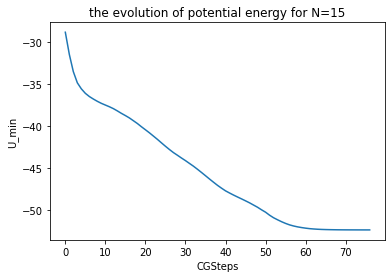

minimum potential energy for nanoparticle with 15 atoms is: -52.32106498328008
done with 1 simulations for N=16, U: -55.9391202960571
done with 2 simulations for N=16, U: -56.81315411108563
done with 3 simulations for N=16, U: -56.81409284989706
done with 4 simulations for N=16, U: -53.90515183624374
done with 5 simulations for N=16, U: -54.98923934187295
done with 6 simulations for N=16, U: -55.90336663897629
done with 7 simulations for N=16, U: -55.9379017365429
done with 8 simulations for N=16, U: -56.811779278102726
done with 9 simulations for N=16, U: -55.93795575518433
done with 10 simulations for N=16, U: -55.90465172871391
done with 11 simulations for N=16, U: -56.81131064880419
done with 12 simulations for N=16, U: -56.81363626178079
done with 13 simulations for N=16, U: -55.8575516399522
done with 14 simulations for N=16, U: -56.81368638585067
done with 15 simulations for N=16, U: -56.81360075536945
done with 16 simulations for N=16, U: -55.90175965995497
done with 17 simulat

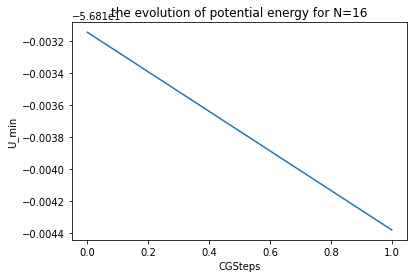

minimum potential energy for nanoparticle with 16 atoms is: -56.81437940651817
done with 1 simulations for N=17, U: -61.31566876747086
done with 2 simulations for N=17, U: -59.577613683864215
done with 3 simulations for N=17, U: -61.31277862053622
done with 4 simulations for N=17, U: -61.31531539839001
done with 5 simulations for N=17, U: -61.31279219896447
done with 6 simulations for N=17, U: -61.30431481192221
done with 7 simulations for N=17, U: -60.34087459608938
done with 8 simulations for N=17, U: -59.53217674376872
done with 9 simulations for N=17, U: -59.37837279052422
done with 10 simulations for N=17, U: -46.09177258453802
done with 11 simulations for N=17, U: -60.34679173234165
done with 12 simulations for N=17, U: -57.16601006216841
done with 13 simulations for N=17, U: -61.304753148237545
done with 14 simulations for N=17, U: -61.30357734000567
done with 15 simulations for N=17, U: -61.313102865624955
done with 16 simulations for N=17, U: -53.13549934542819
done with 17 si

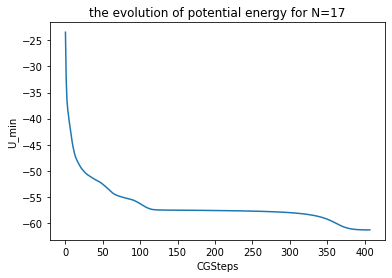

minimum potential energy for nanoparticle with 17 atoms is: -61.31566876747086
done with 1 simulations for N=18, U: -65.79256616839305
done with 2 simulations for N=18, U: -64.80521171582022
done with 3 simulations for N=18, U: -48.714845872508775
done with 4 simulations for N=18, U: -66.27951533229908
done with 5 simulations for N=18, U: -65.83322302023775
done with 6 simulations for N=18, U: -65.52976363736923
done with 7 simulations for N=18, U: -64.93790786516722
done with 8 simulations for N=18, U: -64.61543138947216
done with 9 simulations for N=18, U: -65.83531540437373
done with 10 simulations for N=18, U: -66.2810774120874
done with 11 simulations for N=18, U: -49.616667201224786
done with 12 simulations for N=18, U: -64.70058044664063
done with 13 simulations for N=18, U: -65.83663637419201
done with 14 simulations for N=18, U: -65.83898972329652
done with 15 simulations for N=18, U: -64.87050828080255
done with 16 simulations for N=18, U: -66.27763272879207
done with 17 simu

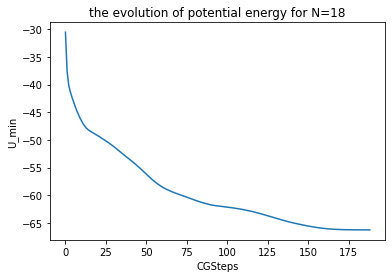

minimum potential energy for nanoparticle with 18 atoms is: -66.2810774120874
done with 1 simulations for N=19, U: -72.6547152140656
done with 2 simulations for N=19, U: -62.12289013208397
done with 3 simulations for N=19, U: -72.65601348232492
done with 4 simulations for N=19, U: -70.81259577122412
done with 5 simulations for N=19, U: -72.65620386408867
done with 6 simulations for N=19, U: -72.65316820306512
done with 7 simulations for N=19, U: -69.03973500038344
done with 8 simulations for N=19, U: -69.44040621100831
done with 9 simulations for N=19, U: -70.14279363798612
done with 10 simulations for N=19, U: -70.33072143538901
done with 11 simulations for N=19, U: -69.86917998553561
done with 12 simulations for N=19, U: -70.27721660740274
done with 13 simulations for N=19, U: -70.8117164925666
done with 14 simulations for N=19, U: -68.81115083822861
done with 15 simulations for N=19, U: -72.65345625354443
done with 16 simulations for N=19, U: -69.91535980322293
done with 17 simulati

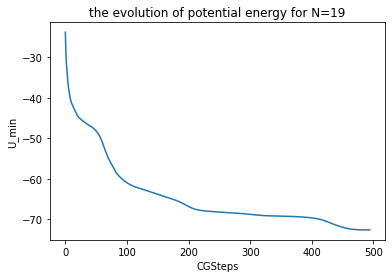

minimum potential energy for nanoparticle with 19 atoms is: -72.65620386408867
done with 1 simulations for N=20, U: -76.28554578263133
done with 2 simulations for N=20, U: -60.17631499607964
done with 3 simulations for N=20, U: -75.40920927830234
done with 4 simulations for N=20, U: -74.5706621154782
done with 5 simulations for N=20, U: -75.30227449032357
done with 6 simulations for N=20, U: -74.36645530976982
done with 7 simulations for N=20, U: -74.48198022328668
done with 8 simulations for N=20, U: -75.13597692542587
done with 9 simulations for N=20, U: -75.06791678846903
done with 10 simulations for N=20, U: -76.2027229213689
done with 11 simulations for N=20, U: -75.57457208848506
done with 12 simulations for N=20, U: -76.19663897395816
done with 13 simulations for N=20, U: -74.36807929466093
done with 14 simulations for N=20, U: -74.26122128594693
done with 15 simulations for N=20, U: -77.1676656947887
done with 16 simulations for N=20, U: -73.16549705165896
done with 17 simulati

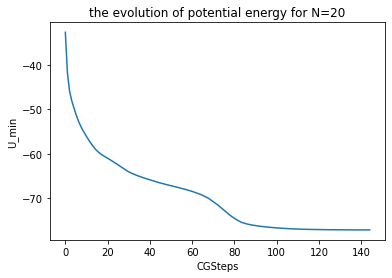

minimum potential energy for nanoparticle with 20 atoms is: -77.17050482973056
done with 1 simulations for N=21, U: -80.44065328088553
done with 2 simulations for N=21, U: -80.82403396461183
done with 3 simulations for N=21, U: -80.44089616108077
done with 4 simulations for N=21, U: -81.6363317847986
done with 5 simulations for N=21, U: -79.7370848852992
done with 6 simulations for N=21, U: -81.67456394969918
done with 7 simulations for N=21, U: -81.64294535948576
done with 8 simulations for N=21, U: -79.92365673042484
done with 9 simulations for N=21, U: -80.10935279206038
done with 10 simulations for N=21, U: -77.5193397040101
done with 11 simulations for N=21, U: -79.92287204186034
done with 12 simulations for N=21, U: -79.2252319709528
done with 13 simulations for N=21, U: -81.64603014060634
done with 14 simulations for N=21, U: -80.34540104219715
done with 15 simulations for N=21, U: -81.64208266806516
done with 16 simulations for N=21, U: -80.82170842034445
done with 17 simulatio

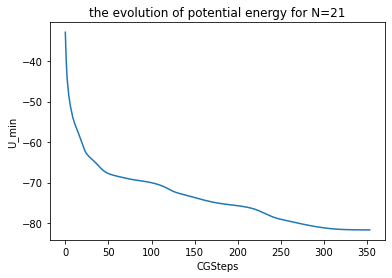

minimum potential energy for nanoparticle with 21 atoms is: -81.67456394969918
done with 1 simulations for N=22, U: -84.47834417842934
done with 2 simulations for N=22, U: -86.11353139356112
done with 3 simulations for N=22, U: -86.16454845752243
done with 4 simulations for N=22, U: -53.0498007156092
done with 5 simulations for N=22, U: -78.68013781047692
done with 6 simulations for N=22, U: -86.56311229554774
done with 7 simulations for N=22, U: -83.95403446011836
done with 8 simulations for N=22, U: -86.78823959823659
done with 9 simulations for N=22, U: -86.19973326705913
done with 10 simulations for N=22, U: -86.02218929210765
done with 11 simulations for N=22, U: -82.94556045918833
done with 12 simulations for N=22, U: -53.06005776804832
done with 13 simulations for N=22, U: -85.28916651233044
done with 14 simulations for N=22, U: -86.19732984563973
done with 15 simulations for N=22, U: -72.75450375166216
done with 16 simulations for N=22, U: -86.1691724594182
done with 17 simulat

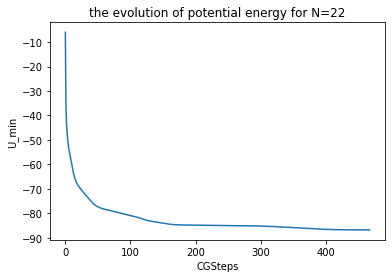

minimum potential energy for nanoparticle with 22 atoms is: -86.78823959823659
done with 1 simulations for N=23, U: -92.8358142112994
done with 2 simulations for N=23, U: -90.25813181559602
done with 3 simulations for N=23, U: -91.18468116696123
done with 4 simulations for N=23, U: -91.0452384511967
done with 5 simulations for N=23, U: -90.46283610106713
done with 6 simulations for N=23, U: -82.72175114396323
done with 7 simulations for N=23, U: -91.06591532884956
done with 8 simulations for N=23, U: -90.63443124882114
done with 9 simulations for N=23, U: -90.45624393037181
done with 10 simulations for N=23, U: -91.37569579812885
done with 11 simulations for N=23, U: -92.82886226877507
done with 12 simulations for N=23, U: -90.64018390280545
done with 13 simulations for N=23, U: -91.04620344880739
done with 14 simulations for N=23, U: -73.32472837139302
done with 15 simulations for N=23, U: -88.70944888637514
done with 16 simulations for N=23, U: -90.59777624600916
done with 17 simulat

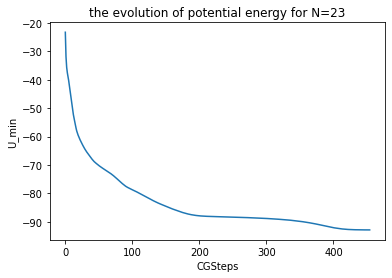

minimum potential energy for nanoparticle with 23 atoms is: -92.8358142112994
done with 1 simulations for N=24, U: -94.97931249548621
done with 2 simulations for N=24, U: -95.56854763121648
done with 3 simulations for N=24, U: -94.28906617312833
done with 4 simulations for N=24, U: -82.99256034886358
done with 5 simulations for N=24, U: -95.22633379390308
done with 6 simulations for N=24, U: -97.31975462612861
done with 7 simulations for N=24, U: -95.92937646696639
done with 8 simulations for N=24, U: -95.48715255872958
done with 9 simulations for N=24, U: -94.47118742125899
done with 10 simulations for N=24, U: -94.9858892235948
done with 11 simulations for N=24, U: -97.29778299930372
done with 12 simulations for N=24, U: -94.33301403117513
done with 13 simulations for N=24, U: -95.82496159099225
done with 14 simulations for N=24, U: -95.5940999182564
done with 15 simulations for N=24, U: -97.30275338835301
done with 16 simulations for N=24, U: -94.9881034833976
done with 17 simulatio

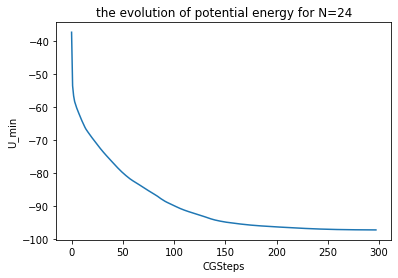

minimum potential energy for nanoparticle with 24 atoms is: -97.32719420381629
done with 1 simulations for N=25, U: -101.86190888160077
done with 2 simulations for N=25, U: -100.54775868167863
done with 3 simulations for N=25, U: -99.51856056315759
done with 4 simulations for N=25, U: -102.35233712329179
done with 5 simulations for N=25, U: -101.04770008296097
done with 6 simulations for N=25, U: -99.55087861837009
done with 7 simulations for N=25, U: -98.30125885296965
done with 8 simulations for N=25, U: -99.09674542297945
done with 9 simulations for N=25, U: -100.68700000176203
done with 10 simulations for N=25, U: -87.6234290748757
done with 11 simulations for N=25, U: -102.35233300761733
done with 12 simulations for N=25, U: -101.77886865537307
done with 13 simulations for N=25, U: -99.26611063459201
done with 14 simulations for N=25, U: -99.96065784357228
done with 15 simulations for N=25, U: -98.50237887365385
done with 16 simulations for N=25, U: -101.85400590750544
done with 1

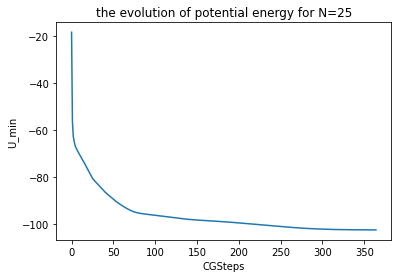

minimum potential energy for nanoparticle with 25 atoms is: -102.35233712329179


In [40]:
# Task 3 

from ase import Atoms
from ase.visualize import view
from ase.io.trajectory import Trajectory

M = 20

ratio_N_V = 0.05
factor = 1.0

U_CSSteps_array = np.empty((24, 2))

for N in range(2, 26): 

    alpha = 0.0001*(N**(-2/3)) 
    L = (N/ratio_N_V)**(1/3)
    U_min = math.inf   
    
    MaxCGSteps = 9*(N**2) + 193*N - 420
     
    for i in range(M):
        
        r_i = r(N, L)
        U_cg, CGSteps, pos_U_df = conjugate_gradient_better(r_i, N, MaxCGSteps) 
        
        if U_cg < U_min: 
            
            U_min = U_cg
            
            plot_steps = CGSteps
            plot_pos = pos_U_df.pos
            plot_U = pos_U_df.U
        
        print(f'done with {i+1} simulations for N={N}, U: {(U_cg)}')
    
    U_CSSteps_array[N-2] = U_min, plot_steps
    
    k = 0
    while plot_U.iloc[k] >= 0:
        k += 1
    x = range(plot_steps-k)
    y = plot_U[k:]

    plt.plot(x, y)
    
    plt.title(f'the evolution of potential energy for N={N}')
    plt.xlabel('CGSteps')
    plt.ylabel('U_min')
    plt.show()
    
    print('minimum potential energy for nanoparticle with', N, 'atoms is:', U_min)
    
    pos_list = list(plot_pos)
    
    file_name = 'nano' + str(N) + '.traj'
    atom = 'C' + str(N)
    
    traj = Trajectory(file_name, 'w')
    for j in range(plot_steps): 
        nano = Atoms(atom, pos_list[j]*factor)
        traj.write(nano)

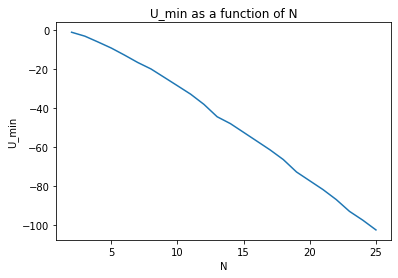

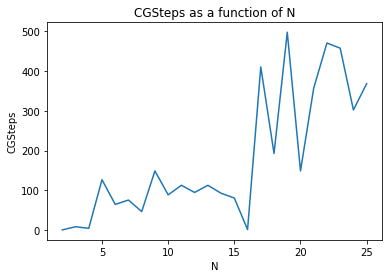

In [41]:
# Task 2

n = np.array(range(2, 26))

plt.plot(n, U_CSSteps_array[:, 0])

plt.title('U_min as a function of N')
plt.xlabel('N')
plt.ylabel('U_min')
plt.show()

plt.plot(n, U_CSSteps_array[:, 1])

plt.title('CGSteps as a function of N')
plt.xlabel('N')
plt.ylabel('CGSteps')
plt.show()

the macroscopic estimate for energy is given by the function [a + b*(N**(2/3) + c*N] with
a = -3.0783485997876863 
b = 11.453650881459367 
c = -7.907704270752117


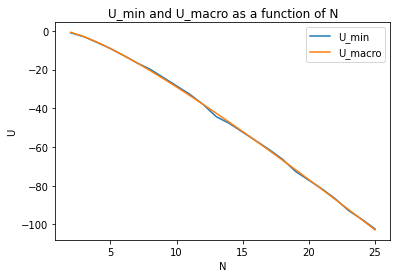

In [42]:
# Task 4
  
import scipy.optimize as optimization

def func(N, a, b, c):
    return a + b*(N**(2/3)) + c*N

a, b, c = optimization.curve_fit(func, n, U_CSSteps_array[:, 0])[0] 

print(f'the macroscopic estimate for energy is given by the function [a + b*(N**(2/3) + c*N] with\na = {a} \nb = {b} \nc = {c}')

U_macro = a + b*(n**(2/3)) + c*n

plt.plot(n, U_CSSteps_array[:, 0], label='U_min')
plt.plot(n, U_macro, label='U_macro')

plt.title('U_min and U_macro as a function of N')
plt.xlabel('N')
plt.ylabel('U')

plt.legend()
plt.show()